<a href="https://colab.research.google.com/github/junecv/EAD/blob/main/kaggle_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [ ]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# read training data

URL = 'https://drive.google.com/file/d/1fZUoe_uhJ38CQsFoMWvKcI5hJquYC0k5/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
train = pd.read_csv(path)

URL = 'https://drive.google.com/file/d/1EaJOtSOvAnTw3KDnlta4awwci2rqNaPo/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
test = pd.read_csv(path)

## Round 1: Assignment Requirement

### EDA

#### Data Structure

In [ ]:
# review training data
# assign train to df

train.iloc[:,1:].info()
train.iloc[:,1:].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
# check for missing data

train.isnull().values.any()

False

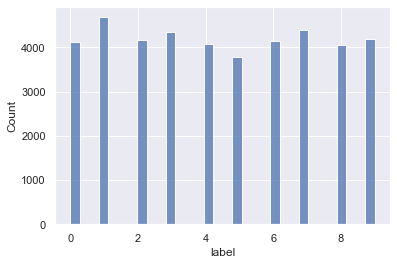

In [ ]:
# review distributions of response

sns.histplot(train['label']);

# distribution is not skewed 

#### Review individual features

In [ ]:
lst0 = []       # list of columns with all entries == 0
lst1 = []       # list of columns with all entries == 255
lst2 = []       # list of columns not in list 0 or 1

col = train.iloc[:,1:].columns

for i in col[1:]:
  if train[i].mean() == 0:
    lst0.append(i)
  else:
    if train[i].mean() == 255:
      lst1.append(i)
    else: 
      lst2.append(i)

# print(lst0)
# print(lst1)
# print(lst2)

# 76 pixels are exactly the same, being all white
# no pixels are all black
# 708 pixels contains different information

#### Review features relationships

In [ ]:
# # create heatmap to examine correlations within lst2
# corr = df[lst2].corr()
# plt.subplots(figsize=(18, 18))
# sns.heatmap(corr, vmax=.8, square=True, annot=False, cmap='coolwarm');

In [ ]:
# # above correlation graph shows an interesting pattern. 
# # zoom in to view corr of ~10% of pixels in lst2

# corr = df[lst2[0:70]].corr()
# plt.subplots(figsize=(18, 18))
# sns.heatmap(corr, vmax=.8, square=True, annot=False, cmap='coolwarm');

In [ ]:
# the immediate area around center diagonal shows correlation between pixels
# that are right next to each other, like pixel12 and pixel13

# the two orange red lines parallel to the center diagonal shows correlation 
# between pixels that are above/below each other, like pixel58 and pixel86,
# as they 86 - 58 = 28.

### Modeling (per Assignment Requirements) 

#### Random Forest Classifier I

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

# Prepare training set
X, y = df.iloc[:,1:], df['label']

# fit RandomForestClassifer model and measure training time
rfc = RandomForestClassifier()
start_time = time.time()
rfc.fit(X,y)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

RandomForestClassifier()


elapsed_time = 26.881176948547363 s


In [ ]:
# make predictions on test set

## prepare test set
X = test

## make prediction 
pred = rfc.predict(X)

## prepare submission file
submission = pd.DataFrame({'ImageId': (X.index + 1), 'Label': pred})

# export prediction
submission.to_csv('submission_rfc1.csv', index=False)

#### PCA

In [ ]:
# combine trainig and test set
X = train.iloc[:,1:].append(test)

# standardize dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# perform PCA on full set of explantory variables
from sklearn.decomposition import PCA
import time

pca = PCA()
start_time = time.time()
pca.fit(X_scaled)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

PCA()


elapsed_time = 9.95266580581665 s


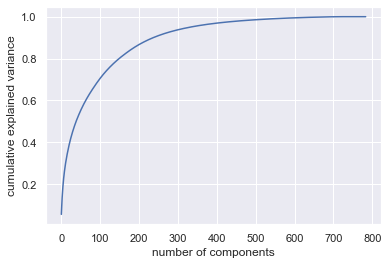

In [ ]:
# review grqaphically # of components vs % of the variability explained

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# initiate pca_result datafram 
pca_result = pd.DataFrame({'col': X.columns, 'ratio': pca.explained_variance_ratio_})

# calculate culmulated ratio
pca_result['culmulated_ratio'] = pca_result['ratio'].cumsum()

# create list of variables that explain for 95% of the variability in the explanatory variables
lst = []
counter = 0

for i in range(len(pca_result)):
  count = int(pca_result['culmulated_ratio'][i] >= 0.95)
  counter += count
  if (counter == 0) | (counter == 1):
    lst.append(pca_result['col'][i])
  else: pass

len(lst)

332

#### Random Forest Classifier II

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

# Prepare training set
X, y = train[lst], df['label']

# fit RandomForestClassifer model and measure training time
rfc = RandomForestClassifier()
start_time = time.time()
rfc.fit(X,y)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

RandomForestClassifier()


elapsed_time = 17.097267866134644 s


In [ ]:
# make predictions on test set

## prepare test set
X = test[lst]

## make prediction 
pred = rfc.predict(X)

## prepare submission file
submission = pd.DataFrame({'ImageId': (X.index + 1), 'Label': pred})
submission.to_csv('submission_rfc2.csv', index=False)

#### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# prepare traiing set
X = train.iloc[:,1:].append(test)

# Fit kmean and record fitting time
start_time = time.time()
kmeans = KMeans(n_clusters = 10, n_init = 10, random_state = 12).fit(X)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

In [ ]:
# assign labels to groups

labels = pd.DataFrame({'kmeans': np.unique(kmeans.labels_),  
                       'actual': np.NAN,
                       'j': np.NAN})

for i in np.unique(kmeans.labels_):
  index = np.where(kmeans.labels_[:len(train)] == i)
  j = 0
  while pd.isnull(labels.loc[i, 'actual']):
    group = df.iloc[index]['label'].value_counts().index[j]
    if group not in set(labels['actual']):
      labels.loc[i, 'actual'] = group
      labels.loc[i, 'j'] = j
    else: 
      j += 1

labels

In [ ]:
# map actual label to kmeans label

map = labels.set_index('kmeans').to_dict()['actual']
pred = [map[i] for i in kmeans.labels_]

In [ ]:
# review accuracy on training set

(pred[:len(train)] == train['label']).value_counts()

In [ ]:
## prepare submission file
submission = pd.DataFrame({'ImageId': (test.index + 1), 'Label': pred[len(train):]})
submission.to_csv('submission_kmeans.csv', index=False)

### Discussion on Design Flaw

The major design flaw from above modeling process is that it did not properly evaluate models before attempt to submit prediction When no model evaluation process (e.g. CV) in place (e.g. cross-validation, fine-tuning hyperparameter). The evaluation process is inefficient by submitting and testing out Kaggle results. 

Below steps shall improve on the process.

## Round 2: Revisiting Process

### EDA

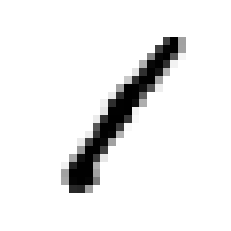


label is 1


In [ ]:
# plot sample as img

digit = train.iloc[0, 1:].values
digit_img = digit.reshape(28,28)

plt.imshow(digit_img, cmap='binary')
plt.axis('off')
plt.show()

print('\nlabel is', train['label'][0]);

#### Review features relationships

In [ ]:
# create heatmap to examine label 0 correlations within lst2

# for i in range(10):
#   corr = train[train['label'] == i][lst2].corr()
#   plt.subplots(figsize=(18, 18))
#   title = 'correlation matrxi for label=' + str(i)
#   g = sns.heatmap(corr, square=True, annot=False, cmap='coolwarm');
#   g.set_title(title)
#   plt.show()

### Modeling

#### Random Forest Classifier III 

In [ ]:
# since base model achieves 96% plus accuracy
# we shall start with RFC, with scaling

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import time

# Prepare training set
scaler = StandardScaler()
X, y = train.iloc[:,1:], train['label']

# fit RandomForestClassifer model and measure training time
rfc = RandomForestClassifier(n_jobs=-1)
start_time = time.time()
rfc.fit(X,y)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

RandomForestClassifier(n_jobs=-1)


elapsed_time = 6.752580881118774 s


In [ ]:
# perform cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(rfc, X, y, cv=10, scoring = 'f1_macro', verbose = 3, n_jobs=-1)
print('CV score =' , score , 'CV score mean = ', score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   48.8s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   48.9s remaining:   21.0s


CV score = [0.96222844 0.96079801 0.96368627 0.96150023 0.96105502 0.9633533
 0.9711274  0.96648304 0.96553506 0.96892047] CV score mean =  0.9644687236686028


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   59.7s finished


In [ ]:
# Review erros

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pred = cross_val_predict(rfc, X, y, cv = 3)
conf_mx = confusion_matrix(y, pred)
conf_mx

array([[3635,    0,    4,    2,    4,    5,   17,    0,   23,    4],
       [   0, 4155,   27,   13,    9,    3,    6,    8,    8,    3],
       [  18,   11, 3651,   18,   20,    2,   12,   36,   22,    5],
       [   6,    5,   67, 3636,    2,   54,    5,   29,   53,   24],
       [   7,    4,    8,    1, 3577,    1,   23,    7,   11,   71],
       [  21,    7,    2,   65,    6, 3249,   24,    3,   20,   17],
       [  23,    5,    3,    0,    8,   23, 3633,    0,   16,    0],
       [   2,   20,   43,    5,   33,    1,    0, 3810,   10,   54],
       [   8,   22,   19,   38,   16,   29,   14,    2, 3440,   46],
       [  22,    5,   11,   57,   60,   14,    3,   38,   24, 3517]])

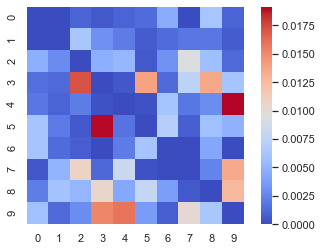

In [ ]:
# investigate errors
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

# remove diagonal entries
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, square=True, annot=False, cmap='coolwarm');

In [ ]:
# the algorithm performs wweaker for label 3 and 9
# potential improvement could be made in preprocessing targeting these two labels

##### Random Forest Tuning

In [ ]:
# upon multiple tuning, max_features = sqrt
# grid search on max_depth and n_estimators

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': (5, 10, 50, 100, 500), 'n_estimators' : (300, 400, 500)}
grid = GridSearchCV(RandomForestClassifier(max_features='sqrt', n_jobs=-1), param_grid, refit = True, verbose=1, scoring='f1_macro', n_jobs=-1)
grid.fit(X,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/jc/opt/miniconda3/envs/msds_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': (5, 10, 50, 100, 500),
                         'n_estimators': (300, 400, 500)},
             scoring='f1_macro', verbose=1)

In [ ]:
# review grid result

grid.__dict__

{'scoring': 'f1_macro',
 'estimator': RandomForestClassifier(max_features='sqrt', n_jobs=-1),
 'n_jobs': -1,
 'refit': True,
 'cv': None,
 'verbose': 1,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'max_depth': (5, 10, 50, 100, 500),
  'n_estimators': (300, 400, 500)},
 'multimetric_': False,
 'best_index_': 14,
 'best_score_': 0.9655330326267763,
 'best_params_': {'max_depth': 500, 'n_estimators': 500},
 'best_estimator_': RandomForestClassifier(max_depth=500, max_features='sqrt', n_estimators=500,
                        n_jobs=-1),
 'refit_time_': 30.65011715888977,
 'scorer_': make_scorer(f1_score, pos_label=None, average=macro),
 'cv_results_': {'mean_fit_time': array([ 48.21531353,  60.22950139,  76.63514304,  84.71937099,
         109.44320235, 127.44392061, 107.70357246, 138.5172812 ,
         159.85722957,  98.80909882, 132.94020658, 170.82261662,
         104.34139142, 136.06692395, 121.96926603]),
  'std_fit_time': array([ 0

In [ ]:
# upon reviewing grid_results,    {'max_depth': 50, 'n_estimators': 400, max_features:'sqrt'}
# is chosen because it achieves very close results when compare to {'max_depth': 500, 'n_estimators': 500}
# a less flexible model generally produce better result in test.

# fitting again with fine-tuned parameters
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import time

# Prepare training set
scaler = StandardScaler()
X, y = train.iloc[:,1:], train['label']

# fit RandomForestClassifer model and measure training time
rfc = RandomForestClassifier(max_depth=50, n_estimators=400, max_features='sqrt', n_jobs=-1)
start_time = time.time()
rfc.fit(X,y)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=400,
                       n_jobs=-1)


elapsed_time = 26.486990213394165 s


#### K-Nearest Neighbour (Tuned)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
import time

# Prepare training set
scaler = StandardScaler()
X, y = scaler.fit_transform(train.iloc[:,1:]), train['label']


# fit RandomForestClassifer model and measure training time
knn_clf = KNeighborsClassifier(weights='distance', n_jobs=-1)
start_time = time.time()
knn_clf.fit(X,y)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's')

# upon multiple tuning, weights = 'distance' is better than 'uniform'
# no difference between algorithm setting
# n_neighbors = 3 provides the best results, k = 5 also perform closely
# perform final search for n_neighbours

for i in (1, 3, 5, 7, 9):
  knn_clf = KNeighborsClassifier(n_neighbors=i, weights='distance', n_jobs=-1)
  start_time = time.time()
  knn_clf.fit(X,y)
  elapsed_time = time.time() - start_time
  print('\nelapsed_time =', elapsed_time, 's')
  pred = cross_val_predict(knn_clf, X, y, cv = 3, n_jobs=-1)
  score = f1_score(y, pred, average = 'macro')
  print('f1 macro score of n_neighbors=', i, 'is', score)

KNeighborsClassifier(n_jobs=-1, weights='distance')


elapsed_time = 0.015182971954345703 s


In [ ]:
# Upon fine tuning, KNN does not perform as well as Random Forest and SVC.

#### SVC OneVsRest

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import time

# Prepare training set
X, y = train.iloc[:,1:], train['label']

# create SVC
ovr_clf = SVC(decision_function_shape='ovr')
start_time = time.time()
ovr_clf.fit(X, y)
elapsed_time = time.time() - start_time
print('\nelapsed_time =', elapsed_time, 's\n')

# perform cross validation
score = cross_val_score(ovr_clf, X, y, cv = 3, scoring = 'f1_macro', n_jobs=-1)
print('CV score =' , score , 'CV score mean = ', score.mean())

SVC()


elapsed_time = 224.44189715385437 s



##### SVC Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': (5, 10, 20, 30, 40, 50)}
grid = GridSearchCV(SVC(decision_function_shape='ovr'), param_grid, refit = True, scoring='f1_macro', n_jobs=-1)
grid.fit(X,y)
grid.__dict__

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': (5, 10, 20, 30, 40, 50)}, scoring='f1_macro')

{'scoring': 'f1_macro',
 'estimator': SVC(),
 'n_jobs': -1,
 'refit': True,
 'cv': None,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'C': (5, 10, 20, 30, 40, 50)},
 'multimetric_': False,
 'best_index_': 1,
 'best_score_': 0.9662680192586223,
 'best_params_': {'C': 10},
 'best_estimator_': SVC(C=10),
 'refit_time_': 207.20520114898682,
 'scorer_': make_scorer(f1_score, pos_label=None, average=macro),
 'cv_results_': {'mean_fit_time': array([551.45630617, 560.10795302, 578.19227653, 570.48312669,
         551.08063974, 450.39531484]),
  'std_fit_time': array([ 5.14004676, 14.36708977,  5.21793676,  6.56677513, 48.06636829,
          3.48103743]),
  'mean_score_time': array([177.39262209, 180.73670883, 187.04989109, 191.27028565,
         181.70703311, 139.66910763]),
  'std_score_time': array([ 2.0266121 ,  3.74434317,  1.96566755,  4.61686421, 19.47623875,
          4.51140583]),
  'param_C': masked_array(data=[5, 10, 2

In [ ]:
# refitting C=10
# Prepare training set
X, y = train.iloc[:,1:], train['label']
ovr_clf = SVC(decision_function_shape='ovr', C=10)
ovr_clf.fit(X, y)

SVC(C=10)

### Predict on test set

In [ ]:
# Random Forest Classifier (tuned)
pred = rfc.predict(test)

## prepare submission file
submission = pd.DataFrame({'ImageId': (test.index + 1), 'Label': pred})

# export prediction
submission.to_csv('submission_rfc3.csv', index=False)

In [ ]:
# SVM Classifier (tuned)
pred = ovr_clf.predict(test)

## prepare submission file
submission = pd.DataFrame({'ImageId': (test.index + 1), 'Label': pred})

# export prediction
submission.to_csv('submission_ovr_clf.csv', index=False)

### Conclusion

Ditig reconition was one of the very first application of machine learning in solving real live problem. It helped US Post Office to process letter distributions more efficiently. 

3 models were built and each evaluated by cross-valiation, and carried out parameter tuning. KNN doesn't perform close to Random Forest or SVC. 

| Model | Training Time | Public Result |
|--- | --- | --- |
| Random Forest | 6.75s | 0.96764 |
| SVC (OneVsRest) | 224.44s |0.98207 |

SVC tuned model had a slightly higher f1 score (averaging all classes) than Random Forest while the prediction result is way better. It could be because Random Forest model is biased towards the seen data.